In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

In [5]:
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target =\
train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [16]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))

    if a_layer: #레이어가 있으면 추가해라
        model.add(a_layer)

    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [18]:
model = model_fn()
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam',
)
history = model.fit(
    train_scaled, 
    train_target, 
    epochs=20, 
    verbose=0,
    validation_data=(val_scaled, val_target)
)

In [25]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

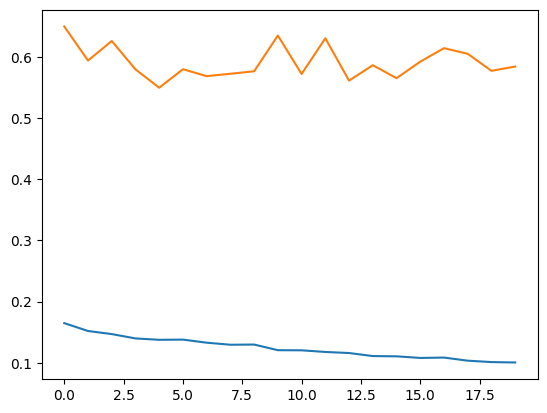

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
#plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss']) #과대적합 > optimizer...
plt.show()

In [41]:
model = model_fn(keras.layers.Dropout(0.3)) #Dropout이라는 새 레이어 생성
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'best_model.keras', 
    save_best_only=True) #가진 것 중 제일 좋은 것 하나만 저장

history = model.fit(
    train_scaled, train_target, epochs=20, verbose=0,
    validation_data=(val_scaled, val_target)
)

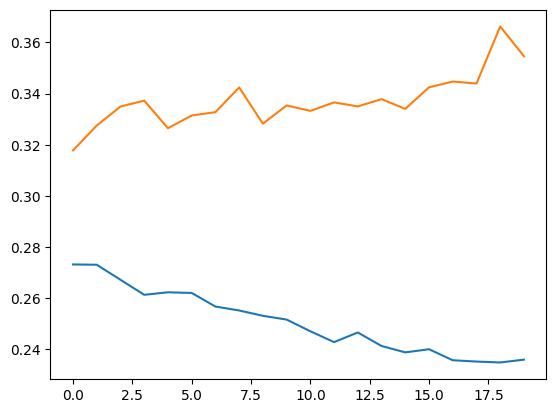

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [49]:
model.save_weights('model.weights.h5') # 모델의 파라미터 저장

In [52]:
model.save('mymodel.keras')